## SVM (Support Vector Machine)

라이브러리

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import mglearn
from library import custom_mglearn # library / custom_mglearn
from sklearn.datasets import make_blobs
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.svm import LinearSVC

<br>

### 1) 가상데이터 

데이터 준비

In [3]:
# 샘플 데이터, 가상의 클러스터 생성
X, y = make_blobs(centers=4, random_state=8) # Generate isotropic Gaussian blobs for clustering.
X[:10]

array([[ -1.72161036,  -1.48033142],
       [ -3.6573384 ,  -9.5482383 ],
       [  7.0778163 ,   0.99508772],
       [ -1.36579859,  -0.3148625 ],
       [ -2.66521206,  -3.12591651],
       [  7.63027116,   8.69797933],
       [ -5.27144331, -12.11880698],
       [  7.91767139,   1.41547387],
       [ -1.41284184,   0.11296348],
       [ -1.01519039,  -1.03318203]])

In [5]:
y

array([3, 2, 1, 3, 3, 0, 2, 1, 3, 3, 0, 0, 3, 1, 1, 2, 2, 3, 3, 0, 0, 1,
       0, 0, 3, 0, 0, 3, 2, 1, 1, 3, 1, 3, 0, 2, 3, 0, 1, 2, 1, 3, 2, 2,
       0, 2, 1, 0, 1, 1, 1, 2, 0, 0, 3, 2, 2, 2, 0, 3, 3, 2, 1, 2, 0, 1,
       3, 1, 0, 0, 1, 2, 0, 1, 0, 0, 3, 2, 3, 1, 2, 0, 3, 2, 3, 2, 0, 2,
       2, 3, 1, 0, 3, 2, 2, 1, 1, 3, 1, 1])

In [6]:
y = y % 2 # label 0,1,2,3 -> label 0,1
y

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1], dtype=int32)

모델 생성, 학습

In [7]:
linear_svm = LinearSVC().fit(X, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


모델 시각화 (2차원)

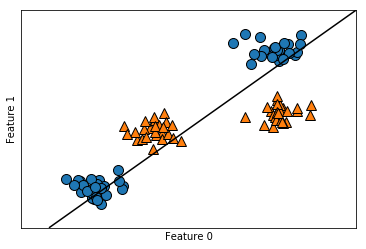

In [8]:
# 선형 경계
custom_mglearn.plot_2d_separator(linear_svm, X)
custom_mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

새로운 Feature 추가 (2차원 -> 3차원) - 두번째 열 제곱

In [10]:
X_new = np.hstack([X, X[:, 1:] ** 2])
X_new

array([[-1.72161036e+00, -1.48033142e+00,  2.19138111e+00],
       [-3.65733840e+00, -9.54823830e+00,  9.11688546e+01],
       [ 7.07781630e+00,  9.95087718e-01,  9.90199567e-01],
       [-1.36579859e+00, -3.14862498e-01,  9.91383928e-02],
       [-2.66521206e+00, -3.12591651e+00,  9.77135405e+00],
       [ 7.63027116e+00,  8.69797933e+00,  7.56548444e+01],
       [-5.27144331e+00, -1.21188070e+01,  1.46865483e+02],
       [ 7.91767139e+00,  1.41547387e+00,  2.00356628e+00],
       [-1.41284184e+00,  1.12963480e-01,  1.27607478e-02],
       [-1.01519039e+00, -1.03318203e+00,  1.06746511e+00],
       [ 8.26341570e+00,  1.03472344e+01,  1.07065259e+02],
       [ 6.96767867e+00,  8.96225230e+00,  8.03219662e+01],
       [-8.47792492e-01, -2.12185612e+00,  4.50227339e+00],
       [ 7.48006237e+00,  2.49392925e+00,  6.21968311e+00],
       [ 7.71454967e+00,  1.84207010e+00,  3.39322225e+00],
       [-7.74064658e+00, -8.61800744e+00,  7.42700522e+01],
       [-5.41087235e+00, -8.71941280e+00

모델 시각화 (3차원)

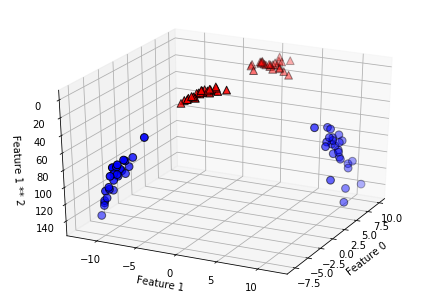

In [11]:
from mpl_toolkits.mplot3d import Axes3D, axes3d

figure = plt.figure()

# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)

mask = y == 0 # 일종의 slicing, array([False,  True, False, False, False, ... ]
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=ListedColormap(['#0000aa', '#ff2020']), s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=ListedColormap(['#0000aa', '#ff2020']), s=60, edgecolor='k')

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")
plt.show()

새로운 열 추가한 데이터로 모델 학습

In [12]:
linear_svm_3d = LinearSVC().fit(X_new, y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


3D 모델 시각화

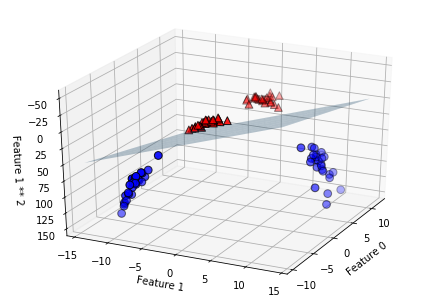

In [13]:
# 선형 결정 경계면 그리기

figure = plt.figure()
ax = Axes3D(figure, elev=-152, azim=-26)

# 좌표계 생성
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)
XX, YY = np.meshgrid(xx, yy)

# 선형 결정 경계 
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)

ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b',
           cmap=ListedColormap(['#0000aa', '#ff2020']), s=60, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^',
           cmap=ListedColormap(['#0000aa', '#ff2020']), s=60, edgecolor='k')

ax.set_xlabel("Feature 0")
ax.set_ylabel("Feature 1")
ax.set_zlabel("Feature 1 ** 2")
plt.show()

결정 경계 그린 후 기존의 좌표계로 복귀 (3차원 -> 2차원)

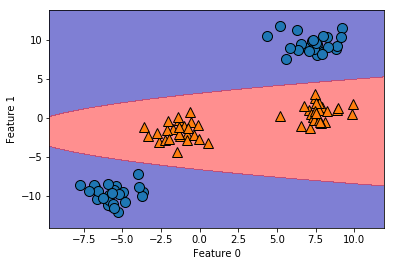

In [14]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()],
             cmap=ListedColormap(['#0000aa', '#ff2020']), alpha=0.5)

custom_mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

#### 자주 사용되는 kernel function

- 다항 커널 (기존의 열들을 바탕으로 가능한 조합을 특정한 차수까지 기존의 데이터에 추가
- 가우시안 커널 (rbf, radial basis function)

kernel function 이용하여 모델 학습

In [15]:
X, y = custom_mglearn.make_handcrafted_dataset()
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y) 

모델 시각화

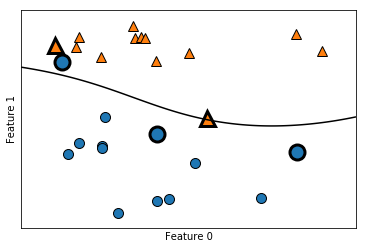

In [16]:
custom_mglearn.plot_2d_separator(svm, X, eps=.5) # eps : 그래프의 확대/축소
custom_mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# Gray Border @ support vectors
sv = svm.support_vectors_
sv_labels = svm.dual_coef_.ravel() > 0
custom_mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=15, markeredgewidth=3)

plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

Hyper-parameter C, gamma에 따른 결정경계 변화

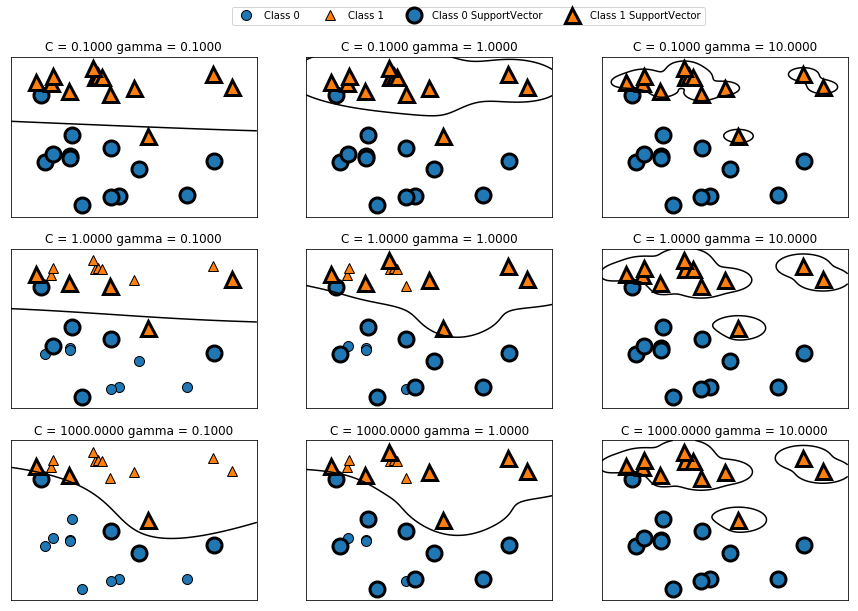

In [17]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]): # log[-1,0,3] == 0.1, 1, 1000 == C
    for a, gamma in zip(ax, range(-1, 2)): # log[-1, 2] == 0.1, 10 == Gamma
        custom_mglearn.plot_svm(log_C=C, log_gamma=gamma, ax=a)

axes[0, 0].legend(["Class 0", "Class 1", "Class 0 SupportVector", "Class 1 SupportVector"], ncol=4, loc=(.9, 1.2))
plt.show()

- C가 커질수록 **overfitting**
- gamma 커질수록 **overfitting**

---

<br>

### 2) Breast Cancer Dataset

데이터 준비

In [43]:
cancer = load_breast_cancer()

train data 75% / test data 25% (default)

In [44]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0) 

모델 생성, 학습

In [20]:
svc = SVC()
svc.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

Accuracy

In [21]:
print("Accuracy on Training set: {:.3f}".format(svc.score(X_train, y_train)))
print("Accuracy on Test set: {:.3f}".format(svc.score(X_test, y_test)))

Accuracy on Training set: 1.000
Accuracy on Test set: 0.629


train data에 대한 정확도 100% -> overfitting(과적합) 발생

boxplot으로 각 열의 데이터 분포 확인

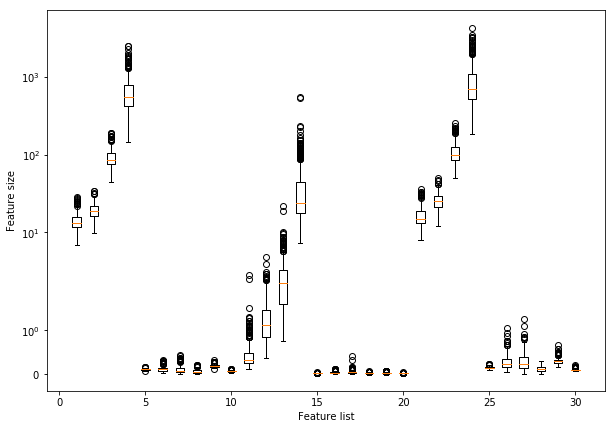

In [22]:
plt.figure(figsize=(10,7))
plt.boxplot(X_train, manage_xticks=False)

plt.yscale("symlog")
plt.xlabel("Feature list")
plt.ylabel("Feature size")
plt.show()

-> 데이터의 각 열마다 scale이 다름을 알 수 있음, 데이터 스케일링(전처리) 필요

#### 데이터 전처리(feature scaling)

: 열 마다 데이터 범위가 비슷해지도록 조정

- Min-max scaling : 최대 1, 최소 0

In [23]:
min_on_training = X_train.min(axis=0) # 열마다의 최소값 계산

range_on_training = (X_train - min_on_training).max(axis=0) # 분모에 해당 
X_train_scaled = (X_train - min_on_training) / range_on_training # Min-max scaling (0~1)

print("열마다의 최소값\n{}".format(X_train_scaled.min(axis=0)))
print("열마다의 최대값\n {}".format(X_train_scaled.max(axis=0)))

열마다의 최소값
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
열마다의 최대값
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [24]:
# test data
X_test_scaled = (X_test - min_on_training) / range_on_training

In [35]:
# sklearn 라이브러리 이용
from sklearn.preprocessing import MinMaxScaler 

sc_minmax = MinMaxScaler()
sc_minmax.fit(X_train) 

# As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set).
X_train_scaled_minmax = sc_minmax.transform(X_train)
X_test_scaled_minmax = sc_minmax.transform(X_test)
# new_data_minmax = sc_minmax.transform(np.array([[1, 2, 3, ... ]])) # 새로운 데이터 scaling

df = pd.DataFrame(X_train_scaled_minmax)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,0.339731,0.395145,0.334143,0.218416,0.475030,0.288643,0.207709,0.244255,0.376127,0.266575,...,0.298357,0.362953,0.284123,0.172643,0.405028,0.218826,0.215241,0.397104,0.262467,0.186936
std,0.168128,0.171063,0.168871,0.152884,0.150482,0.173560,0.183968,0.192935,0.139861,0.144320,...,0.174130,0.161638,0.169157,0.144110,0.151426,0.147373,0.158433,0.226037,0.124762,0.116721
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.224171,0.268050,0.218903,0.117752,0.369339,0.161085,0.070501,0.102932,0.280303,0.162279,...,0.182497,0.248467,0.169119,0.081504,0.294889,0.117405,0.093550,0.224096,0.180465,0.106766
50%,0.302617,0.377593,0.293691,0.173531,0.470566,0.255650,0.144517,0.167843,0.367677,0.245893,...,0.250267,0.351946,0.234947,0.122727,0.403355,0.183087,0.183746,0.340527,0.245614,0.163256
75%,0.415022,0.492946,0.414519,0.266501,0.573151,0.375813,0.297739,0.372875,0.451010,0.332666,...,0.393988,0.463486,0.375342,0.221638,0.493000,0.303102,0.302736,0.555890,0.319732,0.240063
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


- Standardization : 평균 0, 표준편차 1

In [49]:
pd.DataFrame(X_train).describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,...,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000,426.000000
mean,14.159171,19.233005,92.143897,658.415023,0.096366,0.103670,0.088650,0.049144,0.180473,0.062617,...,16.316817,25.637981,107.459131,887.647887,0.132503,0.252836,0.269481,0.115279,0.289649,0.083540
std,3.552381,4.122619,24.437275,360.425054,0.013855,0.050683,0.078517,0.038819,0.027692,0.006852,...,4.894808,6.064671,33.965066,586.352988,0.022930,0.151899,0.198358,0.065619,0.063292,0.017795
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,11.717500,16.170000,75.467500,421.100000,0.086635,0.066420,0.030090,0.020710,0.161500,0.057665,...,13.060000,21.342500,84.367500,516.825000,0.115825,0.148300,0.117125,0.065055,0.248050,0.071318
50%,13.375000,18.810000,86.290000,552.600000,0.095955,0.094035,0.061680,0.033770,0.178800,0.061635,...,14.965000,25.225000,97.585000,684.550000,0.132250,0.216000,0.230050,0.098855,0.281100,0.079930
75%,15.750000,21.590000,103.775000,771.775000,0.105400,0.129125,0.127075,0.075022,0.195300,0.065755,...,19.005000,29.410000,125.775000,1087.000000,0.145825,0.339700,0.379025,0.161375,0.318700,0.091640
max,28.110000,33.810000,188.500000,2501.000000,0.144700,0.311400,0.426800,0.201200,0.304000,0.097440,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.290300,0.663800,0.207500


In [51]:
# sklearn.preprocessing 데이터 전처리에 필요한 메서드, 객체
from sklearn.preprocessing import StandardScaler  # (sklearn.preprocessing.MinMaxScaler is also available)

sc_std = StandardScaler()
sc_std.fit(X_train) # X_train 의 평균과 표준편차를 구함

# As with all the transformations, it is important to fit the scalers to the training data only, not to the full dataset (including the test set).
X_train_scaled_std = sc_std.transform(X_train)
X_test_scaled_std = sc_std.transform(X_test)
# new_data_std = sc_std.transform(np.array([[1, 2, 3, ... ]])) # 새로운 데이터 scaling

df = pd.DataFrame(X_train_scaled_std)
df.describe()

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
count,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,...,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02,4.260000e+02
mean,-3.385138e-15,-1.095107e-15,4.192786e-15,-1.504274e-15,-2.205461e-15,-3.778032e-16,1.139673e-15,4.940623e-16,-4.089061e-15,-2.028372e-15,...,-7.557856e-17,-6.515393e-17,-1.223070e-15,-2.658280e-17,4.438644e-15,-1.110229e-15,-5.054642e-16,1.107617e-17,-2.450830e-15,2.719395e-15
std,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,...,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00,1.001176e+00
min,-2.023041e+00,-2.312656e+00,-1.981021e+00,-1.430312e+00,-3.160432e+00,-1.665026e+00,-1.130378e+00,-1.267483e+00,-2.692455e+00,-1.849288e+00,...,-1.715425e+00,-2.248101e+00,-1.681616e+00,-1.199403e+00,-2.677913e+00,-1.486588e+00,-1.360156e+00,-1.758873e+00,-2.106216e+00,-1.603450e+00
25%,-6.881418e-01,-7.438490e-01,-6.832187e-01,-6.592052e-01,-7.031765e-01,-7.358151e-01,-7.467001e-01,-7.333480e-01,-6.859458e-01,-7.235262e-01,...,-6.661438e-01,-7.091121e-01,-6.806635e-01,-6.331662e-01,-7.282053e-01,-6.890046e-01,-7.689892e-01,-7.662973e-01,-6.580365e-01,-6.876632e-01
50%,-2.210048e-01,-1.027265e-01,-2.398295e-01,-2.939292e-01,-2.969849e-02,-1.903184e-01,-3.438961e-01,-3.965152e-01,-6.049317e-02,-1.434774e-01,...,-2.764983e-01,-6.817629e-02,-2.910562e-01,-3.467820e-01,-1.106401e-02,-2.427903e-01,-1.990212e-01,-2.505942e-01,-1.352366e-01,-2.031163e-01
75%,4.483469e-01,5.723950e-01,4.765171e-01,3.148873e-01,6.528122e-01,5.028367e-01,4.899554e-01,6.674355e-01,5.360367e-01,4.584876e-01,...,5.498364e-01,6.226972e-01,5.398901e-01,3.403863e-01,5.816418e-01,5.725231e-01,5.529024e-01,7.033039e-01,4.595372e-01,4.556986e-01
max,3.931794e+00,3.540015e+00,3.947633e+00,5.118266e+00,3.492692e+00,4.103431e+00,4.311748e+00,3.921702e+00,4.465904e+00,5.087920e+00,...,4.034146e+00,3.945823e+00,4.236997e+00,5.747920e+00,3.933759e+00,5.306877e+00,4.959081e+00,2.670375e+00,5.918486e+00,6.974084e+00


모델 생성, 학습, Accuray 확인

<br>

#### min-max scaling

In [36]:
svc = SVC()
svc.fit(X_train_scaled_minmax, y_train)

print("Accuracy on Training set: {:.3f}".format(svc.score(X_train_scaled_minmax, y_train)))
print("Accuracy on Test set: {:.3f}".format(svc.score(X_test_scaled_minmax, y_test)))

Accuracy on Training set: 0.948
Accuracy on Test set: 0.951


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [53]:
svc = SVC()
svc.fit(X_train_scaled_std, y_train)

print("Accuracy on Training set: {:.3f}".format(svc.score(X_train_scaled_std, y_train)))
print("Accuracy on Test set: {:.3f}".format(svc.score(X_test_scaled_std, y_test)))

Accuracy on Training set: 0.986
Accuracy on Test set: 0.965


- c 증가시켜 더 복잡한 모델 생성

In [57]:
# min-max ver
svc = SVC(C=1000) 
svc.fit(X_train_scaled_minmax, y_train)

print('---MinMax---')
print("Accuracy on Training set: {:.3f}".format(svc.score(X_train_scaled_minmax, y_train)))
print("Accuracy on Test set: {:.3f}".format(svc.score(X_test_scaled_minmax, y_test)))

---MinMax---
Accuracy on Training set: 0.988
Accuracy on Test set: 0.972


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


- c, gamma 증가했을 때

In [58]:
svc = SVC(C=1000, gamma=0.1)
svc.fit(X_train_scaled_minmax, y_train)

print("Accuracy on Training set: {:.3f}".format(svc.score(X_train_scaled_minmax, y_train)))
print("Accuracy on Test set: {:.3f}".format(svc.score(X_test_scaled_minmax, y_test)))

Accuracy on Training set: 0.995
Accuracy on Test set: 0.951


---

<br>

### Hyper parameter(c, gamma) 최적화

AutoMl

- Automated feature-engineering
- Automated model-selection
- Automated HPO

HPO

: Hyper-prameter Optimization (초매개변수 최적화)

- Grid-search 기법
- Randomized-search 기법

#### Grid-Search

In [60]:
from sklearn.model_selection import GridSearchCV

# 아래 param_grid dict 의 C & gamma 에 후보 Hyper-params 값들을 리스트업합니다.
param_grid = {'C' : [0.1, 1, 10, 100, 1000], 
             'gamma' : [1, 0.1, 0.01, 0.001, 0.0001],
             'kernel' : ['rbf']}

grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=1)
# SVC()가 호출되면 SVC Class의 객체 변수가 만들어지고 해당 객체 변수가 GridSearchCV

# refit : 찾아진 가장 좋은 params로 estimator를 setting할 지 여부 (setting해줘야 곧바로 predict가 가능)
# verbose : 설명의 자세한 정도 (verbose를 3과 같이 바꿔보시면 더 자세하게 매 param set 마다의 결과를 확인할 수 있습니다.)

grid.fit(X_train_scaled, y_train)
print('The best parameters are ', grid.best_params_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 25 candidates, totalling 75 fits
The best parameters are  {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}


[Parallel(n_jobs=1)]: Done  75 out of  75 | elapsed:    0.4s finished


#### Precision, Recall, F1-score 등 확인 (classification report)

In [61]:
from sklearn.metrics import classification_report

grid_predictions = grid.predict(X_test_scaled)
print(classification_report(y_test, grid_predictions))

print("Accuracy on Training set: {:.3f}".format(grid.score(X_train_scaled, y_train)))
print("Accuracy on Test set: {:.3f}".format(grid.score(X_test_scaled, y_test)))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.98      0.99      0.98        90

   micro avg       0.98      0.98      0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143

Accuracy on Training set: 0.986
Accuracy on Test set: 0.979
